In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224, antialias=True),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

batch_size = 4
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


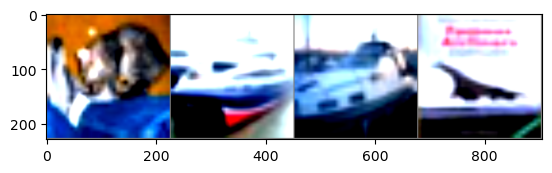

GroundTruth:  cat   ship  ship  plane


In [4]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

adopt performer encoder for tokens-to-token


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


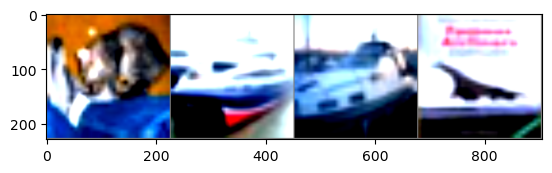

Predicted:  cat   ship  ship  plane


In [5]:
from models import t2t_vit


from models.t2t_vit import *
# create model
model = t2t_vit_14(num_classes=10)


model.load_state_dict(torch.load('checkpoint_cifar10_T2t_vit_14/ckpt_0.05_0.0005_97.46.pth',
                                map_location=torch.device('cuda'))) #, strict=False))

model = model.cuda()

outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


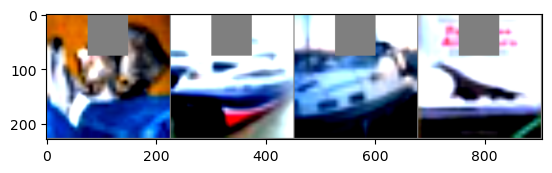

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


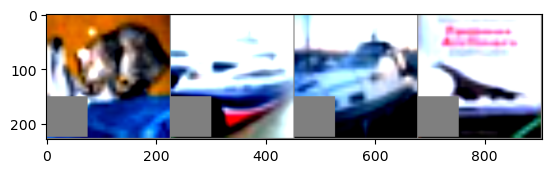

tensor([[[[ 0.6338,  0.6338,  0.6338,  ..., -0.1804, -0.1804, -0.1804],
          [ 0.6338,  0.6338,  0.6338,  ..., -0.1804, -0.1804, -0.1804],
          [ 0.6338,  0.6338,  0.6338,  ..., -0.1804, -0.1804, -0.1804],
          ...,
          [-0.0000, -0.0000, -0.0000,  ..., -2.0220, -2.0220, -2.0220],
          [-1.3823, -1.3823, -1.3823,  ..., -2.0220, -2.0220, -2.0220],
          [-1.3823, -1.3823, -1.3823,  ..., -2.0220, -2.0220, -2.0220]],

         [[-0.2156, -0.2156, -0.2156,  ..., -0.7466, -0.7466, -0.7466],
          [-0.2156, -0.2156, -0.2156,  ..., -0.7466, -0.7466, -0.7466],
          [-0.2156, -0.2156, -0.2156,  ..., -0.7466, -0.7466, -0.7466],
          ...,
          [-0.0000, -0.0000, -0.0000,  ..., -1.1006, -1.1006, -1.1006],
          [-0.3139, -0.3139, -0.3139,  ..., -1.1006, -1.1006, -1.1006],
          [-0.3139, -0.3139, -0.3139,  ..., -1.1006, -1.1006, -1.1006]],

         [[-1.2654, -1.2654, -1.2654,  ..., -1.5776, -1.5776, -1.5776],
          [-1.2654, -1.2654, -

In [6]:
def blur_img(images, vert, horz):
    shape = images.shape[-1]//3
    mask = torch.ones(images.shape)
    mask[:,:,shape*vert:shape*(vert+1),shape*horz:shape*(horz+1)] = 0
    blurred = images*mask
    imshow(torchvision.utils.make_grid(blurred))
    return blurred

dataiter = iter(testloader)
images, labels = next(dataiter)
blur_img(images, 0, 1)
blur_img(images, 2, 0)

In [7]:
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model.cuda()(images.cuda())

_, predicted = torch.max(outputs.data, 1)
predicted

tensor([3, 8, 8, 0], device='cuda:0')

In [8]:
import warnings
warnings.filterwarnings("ignore")
def predict_blurred_patch(data, vert, horz):
    images, labels = data
    blurred = blur_img(images, vert, horz)
    imshow(torchvision.utils.make_grid(blurred))
    # imshow(torchvision.utils.make_grid(images))
    outputs = model(blurred.cuda())
    _, predicted = torch.max(outputs.data, 1)
    print(f'Prediction for blurred {vert, horz} is: ')
    print(' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    
def predict_blurred(data):
    for vert in range(3):
        for horz in range(3):
            predict_blurred_patch(data, vert, horz)
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


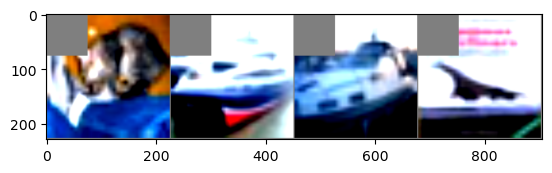

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


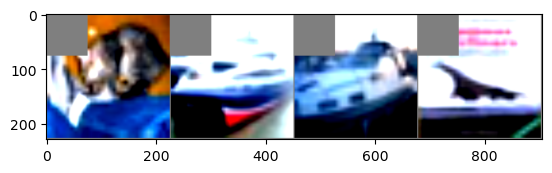

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (0, 0) is: 
cat   ship  ship  plane


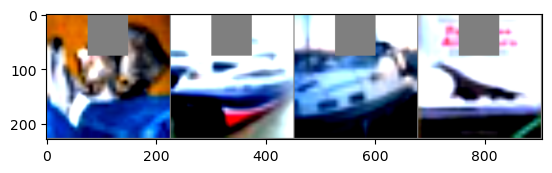

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


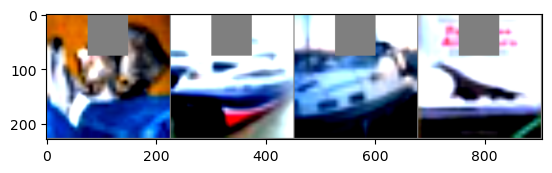

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (0, 1) is: 
cat   ship  ship  plane


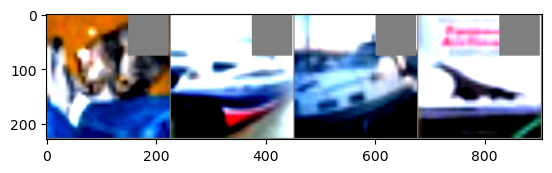

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


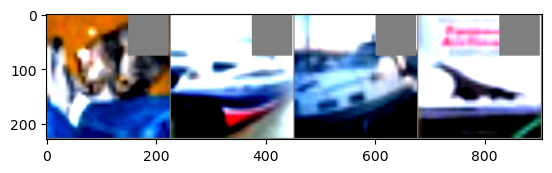

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (0, 2) is: 
cat   ship  ship  plane


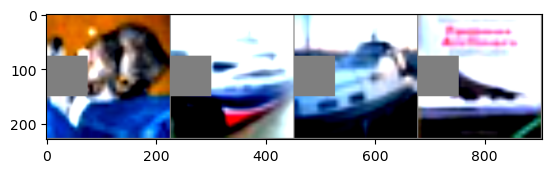

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


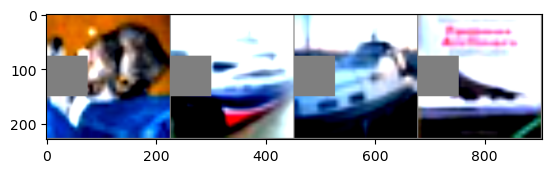

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (1, 0) is: 
cat   ship  ship  plane


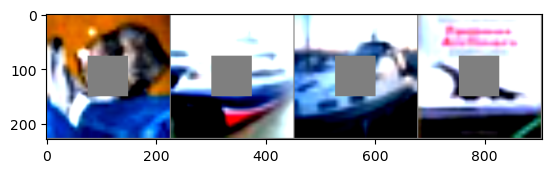

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


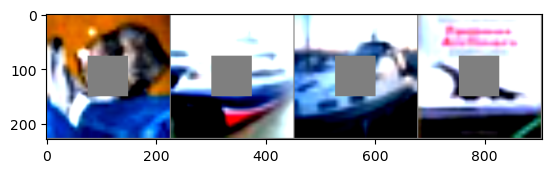

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (1, 1) is: 
cat   ship  ship  plane


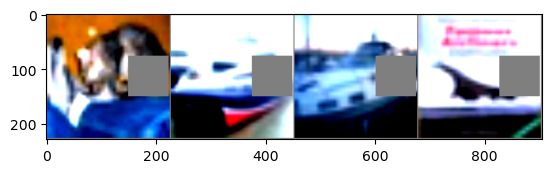

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


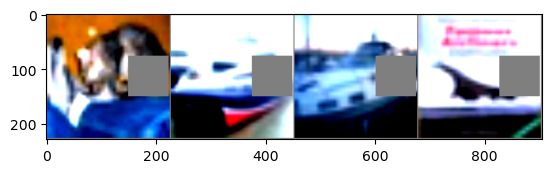

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (1, 2) is: 
cat   ship  ship  plane


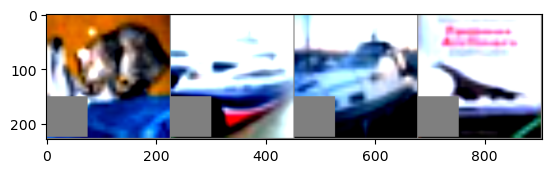

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


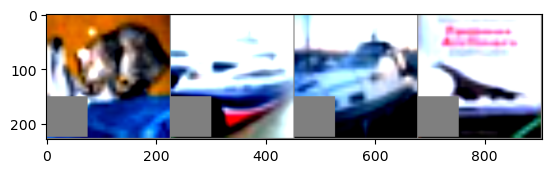

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (2, 0) is: 
cat   ship  ship  plane


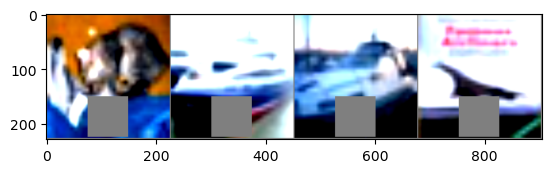

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


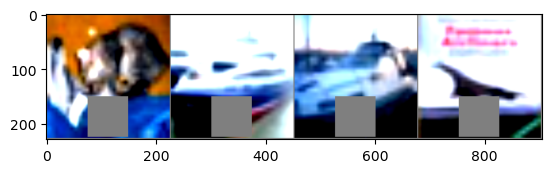

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction for blurred (2, 1) is: 
cat   ship  ship  bird 


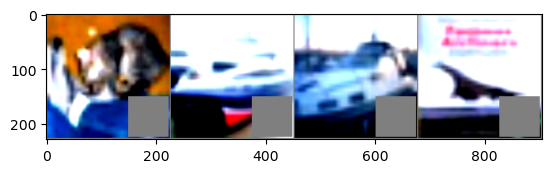

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


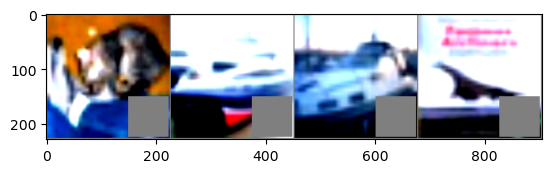

Prediction for blurred (2, 2) is: 
cat   ship  ship  plane
GroundTruth:  cat   ship  ship  plane


In [9]:
data = next(iter(testloader))
predict_blurred(data)

In [10]:
from functools import reduce
import scipy.special
import time

class Shap_values():
    def __init__(self, images, model):
        super(Shap_values, self).__init__()
        self.images = images
        self.model = model
        self.device = images.device

    # patch is a tuple (a,b) with coordinates of patch to fill
    # @staticmethod
    # def fill_patch(patch, pictures):
    #     vert, horz = patch
    #     shape = pictures.shape
    #     mask = torch.zeros(shape)
    #     mask[:,:,shape[-1]*vert:shape[-1]*(vert+1),shape[-1]*horz:shape[-1]*(horz+1)] = 1
    #     filled = pictures*mask
    #     return filled
    @staticmethod
    def powerset(lst):
        return reduce(lambda result, x: result + [subset + [x] for subset in result],
                  lst, [[]])

    def fill_patches(self, patches, pictures):
        shape = pictures.shape
        mask = torch.zeros(shape).to(self.device)
        time_0 = time.time()
        for patch in patches:
            vert, horz = patch
            mask[:,:,shape[-1]*vert:shape[-1]*(vert),shape[-1]*horz:shape[-1]*(horz)] = 1
        return pictures.to(self.device)*mask
        
    def compute_dif(self, regions, feature):
        time_0 = time.time()
        filled = self.fill_patches(regions, self.images)
        filled_feature = self.fill_patches(feature, filled)
        time_1 = time.time()
        # print(f'time of filling patches is {time_1 - time_0}')
        dif = self.model(filled_feature) - self.model(filled)
        # print(f'time of model is {time.time() - time_1}')
        return dif

    def shap_values(self, feature):        
        patches = [(x,y) for x in [0,1,2] for y in [0,1,2]]
        patches.remove(feature[0]) # feature is 1-elt list
        values = torch.zeros(4, 10).to(self.device)
        i = 0
        time_0 = time.time()
        for regions in self.powerset(patches):
            if feature[0] not in regions:
                values += self.compute_dif(regions, feature)/scipy.special.binom(8, len(regions))
        print(f'time of computation was {(time.time() - time_0)/60} minutes')
        return values/9

In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)


Shap_vs = Shap_values(images.cpu(), model.cpu())
Shap_vs.shap_values([(1,1)])

time of computation was 6.618450097242991 minutes


tensor([[-5.7186e-04,  6.1014e-04, -1.4202e-03,  1.3292e-03, -6.9924e-04,
         -1.1413e-03,  1.3315e-03,  5.5734e-04, -5.1842e-04,  6.2719e-04],
        [-1.8465e-03, -2.2321e-03,  7.3441e-04,  1.8526e-03,  5.4830e-04,
          2.7866e-03,  2.6151e-04, -2.2757e-03,  1.7004e-03, -1.6535e-03],
        [-6.4246e-04, -1.9102e-05,  2.8570e-05,  5.8805e-04, -1.0711e-03,
          8.5037e-04,  8.2228e-04, -2.3118e-03,  9.4423e-04,  6.6258e-04],
        [ 1.0162e-03,  1.0362e-03,  1.3275e-03,  9.6112e-04, -4.1779e-03,
          3.4740e-03, -2.2067e-03,  8.4311e-04, -1.2899e-03, -1.0681e-03]],
       grad_fn=<DivBackward0>)